In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df=pd.read_csv(r"C:\Users\Administrator\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.duplicated().any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


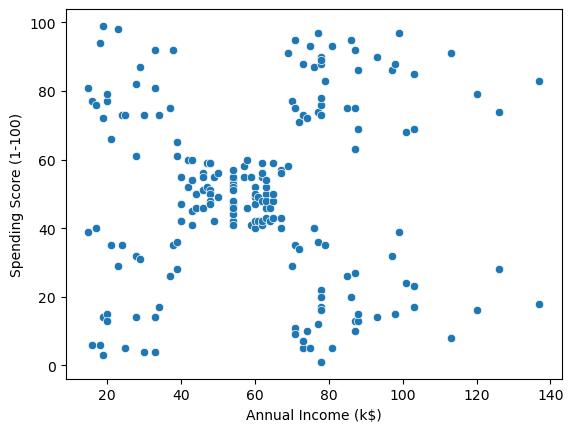

In [5]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()


### scaling the data

In [6]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)



#### using the elbow technique to get the optimal value for k


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

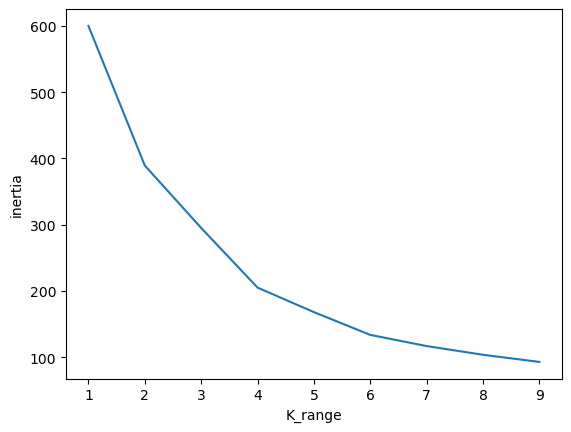

In [8]:
#finding the best k using elbow technique


k_rng=range(1,10)
sse=[]

for k in k_rng:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)


plt.plot(k_rng,sse)
plt.xlabel("K_range")
plt.ylabel('inertia')
plt.show()



#### so the optimal k is 4 that is what we are going to use 


In [9]:
km=KMeans(n_clusters=4,random_state=42)
labels=km.fit_predict(X_scaled)

df['clusters']=labels
df.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [10]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4039582785148566


### from the score we have a very poor performance from our model


#### lets visualize the different clusters

In [12]:
df['clusters'].unique()

array([2, 0, 3, 1])

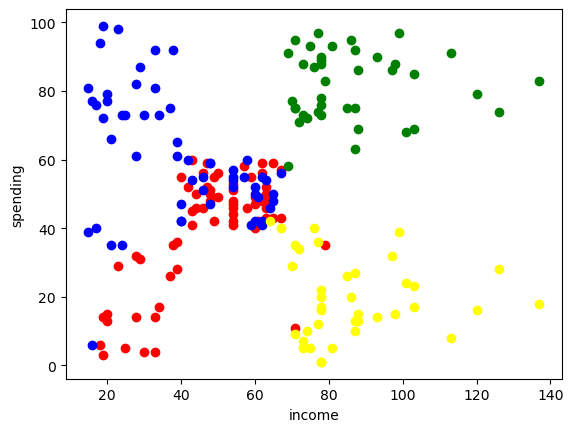

In [15]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
df4=df[df['clusters']==3]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow')

plt.xlabel("income")
plt.ylabel("spending")
plt.show()

#### with the kind of results that we are getting from the score and how we actually have visualized and seen the data it looks like this clustering method is not the best we could choose another clustering methos